# Proyecto Final
## Zaira Valentina Avila Lazcano

El proyecto debe desarrollar las habilidades aprendidas a lo largo del semestre:
- Análisis de dataset (AED)
- Identificación del tipo de problema (clasificación o regresión)
- Creación de propuestas de modelos (qué modelo supervisados utilizar, cómo crear la ANN o CNN a utilizar)
- Evaluación de resultados acorde al problema (clasificación: accuracy, precision, recall, f1; regresión: mse, rmse, r^2, etc. )
- Análisis de resultados (determinar el mejor resultado posible y justificar por qué es el mejor resultado posible)
- El resultado debe ser interpretable

Clasificación: El dataset debe contener lo siguiente:
- Al menos 4 variables de entrada
- El tamaño del dataset debe ser de al menos 2k datos
- Debe ser un dataset que provenga de una fuente real (kaggle, artículo científico, lugar de prácticas/servicio)


Origen: /Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset

### 1-. ANALISIS DEL DATASET (EDA)

El EDA es un paso esencial en cualquier proyecto de ciencia de datos o aprendizaje automático. Su objetivo principal es comprender la estructura, distribución, patrones y tendencias de los datos, para identificar problemas o ideas clave que se deben tener en cuenta antes de construir y evaluar modelos.

In [1]:
# 1. Comprender el Dataset

In [2]:
import os
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import Image
import os
import pandas as pd


In [3]:
dataset_path = '/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset'


In [4]:
training_ds='/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset/Training'
testing_ds='/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset/Testing'

In [5]:
def get_classes(path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

training_classes = get_classes(training_ds)
testing_classes = get_classes(testing_ds)

print("Clases en Training:", training_classes)
print("Clases en Testing:", testing_classes)

Clases en Training: ['pituitary', 'notumor', 'glioma', 'meningioma']
Clases en Testing: ['pituitary', 'notumor', 'glioma', 'meningioma']


In [6]:
def get_data_distribution(path):
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    distribution = {}
    for cls in classes:
        cls_path = os.path.join(path, cls)
        distribution[cls] = len(os.listdir(cls_path))
    return distribution

training_distribution = get_data_distribution(training_ds)
testing_distribution = get_data_distribution(testing_ds)

print("Distribucion de los datos en Training:", training_distribution)
print("Distribucion de los datos en Testing:", testing_distribution)

Distribucion de los datos en Training: {'pituitary': 1457, 'notumor': 1595, 'glioma': 1321, 'meningioma': 1339}
Distribucion de los datos en Testing: {'pituitary': 300, 'notumor': 405, 'glioma': 300, 'meningioma': 306}


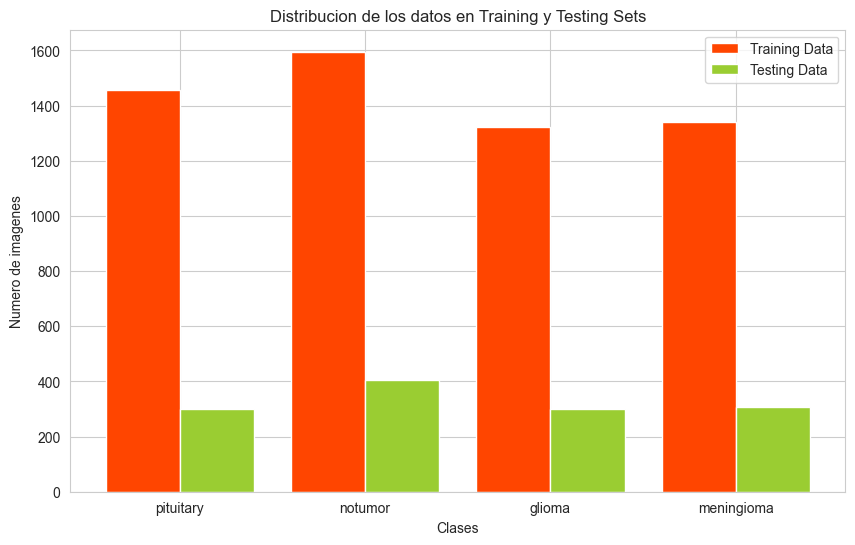

In [7]:
training_distribution , testing_distribution

labels = list(training_distribution.keys())
training_values = list(training_distribution.values())
testing_values = list(testing_distribution.values())

x = range(len(labels))


plt.figure(figsize=(10, 6))
plt.bar(x, training_values, width=0.4, label='Training Data', align='center', color='orangered')
plt.bar([i + 0.4 for i in x], testing_values, width=0.4, label='Testing Data', align='center', color='yellowgreen')
plt.xticks([i + 0.2 for i in x], labels)
plt.xlabel('Clases')
plt.ylabel('Numero de imagenes')
plt.title('Distribucion de los datos en Training y Testing Sets')
plt.legend()
plt.show()

In [8]:
#2. Identificar Tipos de Datos

In [9]:
clases = ['pituitary', 'notumor', 'glioma', 'meningioma']

for clase in clases:
    ruta_clase = os.path.join(training_ds, clase)
    if os.path.isdir(ruta_clase):
        num_imagenes = len(os.listdir(ruta_clase))
        print(f"Clase '{clase}': {num_imagenes} imágenes")
    else:
        print(f"Clase '{clase}' no encontrada en la ruta especificada.")

Clase 'pituitary': 1457 imágenes
Clase 'notumor': 1595 imágenes
Clase 'glioma': 1321 imágenes
Clase 'meningioma': 1339 imágenes


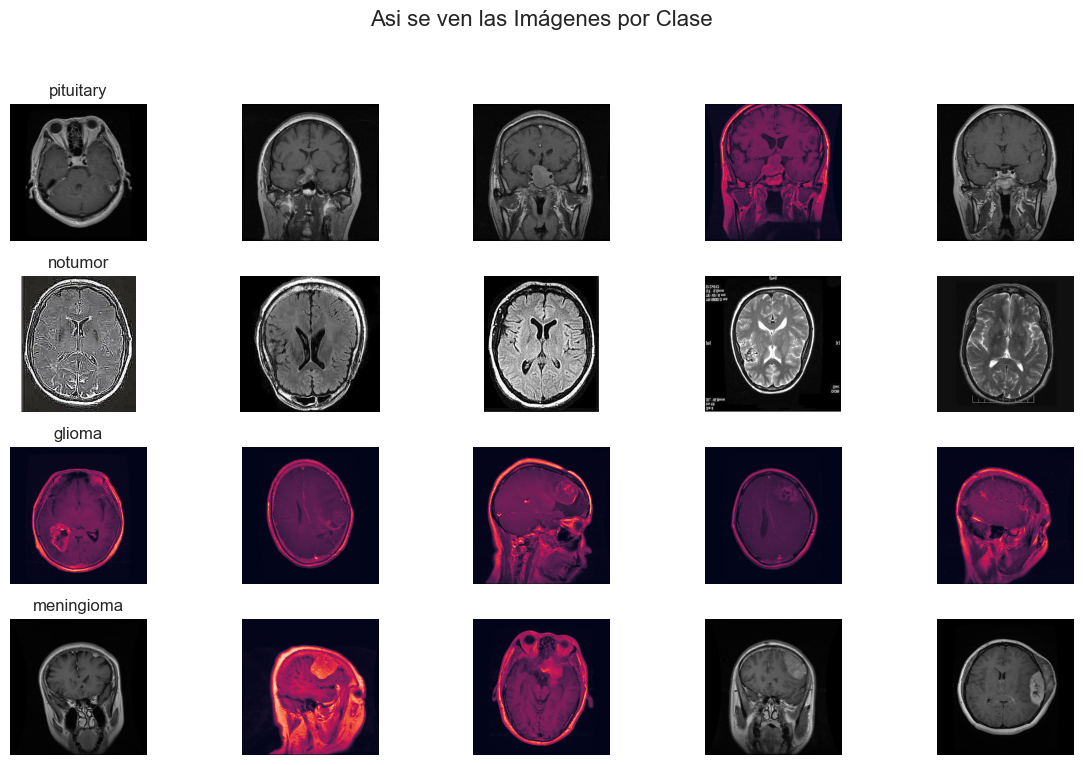

In [10]:
def get_sample_images(path, num_ej_img=5):
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    ej_images = {}
    for cls in classes:
        cls_path = os.path.join(path, cls)
        images = os.listdir(cls_path)[:num_ej_img]
        ej_images[cls] = [os.path.join(cls_path, img) for img in images]
    return ej_images

def visualize_images(ej_images):
    fig, axes = plt.subplots(len(ej_images), len(list(ej_images.values())[0]), figsize=(12, 8))
    fig.suptitle('Asi se ven las Imágenes por Clase', fontsize=16)
    for i, (cls, images) in enumerate(ej_images.items()):
        for j, img_path in enumerate(images):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(cls, fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

training_img = get_sample_images(training_ds, num_ej_img=5)
visualize_images(training_img)

La función get_image_dimensions devuelve las dimensiones de una imagen (ancho y alto). Estas medidas corresponden a los píxeles que conforman la imagen digital.

In [11]:
def get_image_dimensions(path):
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    dimensions_stats = []
    for cls in classes:
        cls_path = os.path.join(path, cls)
        images = os.listdir(cls_path)
        for img_name in images:
            img_path = os.path.join(cls_path, img_name)
            with Image.open(img_path) as img:
                dimensions_stats.append((cls, img.size[0], img.size[1]))
    return pd.DataFrame(dimensions_stats, columns=['Class', 'Width', 'Height'])

training_dimensions = get_image_dimensions(training_ds)

print(training_dimensions.describe())

             Width       Height
count  5712.000000  5712.000000
mean    451.563200   453.883754
std     131.004291   124.779164
min     150.000000   168.000000
25%     441.000000   442.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1920.000000  1446.000000


### 2-. IDENTIFICACION DEL TIPO DE PROBLEMA (CLASIFICACION O REGRESION)

La identificación del tipo de problema es una etapa fundamental al trabajar en proyectos de Machine Learning. Generalmente, los problemas se dividen en dos grandes categorías: clasificación y regresión. La elección entre estos tipos depende del formato de los datos de salida (variable objetivo) que se va intentar predecir.

In [12]:
def problema_clasif(path):
    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    return len(classes) > 1

problem_type = "Clasificación" if problema_clasif(dataset_path) else "Regresión"
print("Tipo de problema:", problem_type)

Tipo de problema: Clasificación


Por lo tanto mi tipo de problema es de clasificación porque el resultado que deseo predecir pertenece a clases discretas. En este caso se intenta clasificar imágenes por:

- Clase 'pituitary'
- Clase 'notumor'
- Clase 'glioma'
- Clase 'meningioma'


### 3-. CREACION DE PROPUESTA DE MODELOS

La creación de propuestas de modelos consiste en determinar las técnicas, algoritmos y arquitecturas de Machine Learning (ML) que se utilizarán para resolver un problema específico. Este proceso implica considerar las características del problema (clasificación, regresión, visión por computadora, etc.), los datos disponibles y los objetivos finales.

1-. Debo considerar que: Un modelo supervisado requiere datos etiquetados (con variables de entrada y salida conocidas).
- En mi caso como se que es un problema de Clasificación (no tabulares)

Es decir, como mi problema tiene datos como imágenes:
- Se recomienda utilizar arquitecturas más avanzadas de redes neuronales: CNN (Convolutional Neural Networks) o RNN (Recurrent Neural Networks).

Por consiguiente trabajare con CNN:
- CNN (Convolutional Neural Network)

Nota: Las redes convolucionales son útiles para tareas visuales o espaciales, completamente optimizadas para imágenes.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
#input_shape = (128, 128, 3)  # Ajustar la forma de entrada según mi conjunto de datos
input_shape = (512, 512, 3)
num_classes = 4  # Ajustar según mi cantidad de clases en el conjunto de datos

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,073,988 (240.61 MB)

 Trainable params: 63,073,988 (240.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_ds='/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset/Training'
testing_ds='/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset/Testing'

In [16]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(training_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(testing_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Aplique lo siguiente:   Modelo CNN con Sequential
- Una red convolucional para clasificar imágenes

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=test_generator)
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 570ms/step - accuracy: 0.8421 - loss: 0.4277 - val_accuracy: 0.8017 - val_loss: 0.5021
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 127s 710ms/step - accuracy: 0.8448 - loss: 0.4021 - val_accuracy: 0.8078 - val_loss: 0.5133
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 115s 638ms/step - accuracy: 0.8438 - loss: 0.4159 - val_accuracy: 0.8108 - val_loss: 0.4547
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 116s 642ms/step - accuracy: 0.8527 - loss: 0.3933 - val_accuracy: 0.8040 - val_loss: 0.4520
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 532ms/step - accuracy: 0.8699 - loss: 0.3600 - val_accuracy: 0.7338 - val_loss: 0.7417
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 446ms/step - accuracy: 0.8702 - loss: 0.3432 - val_accuracy: 0.8207 - val_loss: 0.4602
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 92s 516ms/step - accuracy: 0.8790 - loss: 0.3526 - val_accuracy: 0.8268 - val_loss: 0.4273
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 536ms/step - accuracy: 0.8853 - los

Hasta este punto mi modelo alcanzo una precision del 80.02%, a pesar de funcionar bien en el area medica esto no es suficiente. Puesto que si mi modelo toma decisiones importantes como en la salud, tener una precisión del 80% podría ser insuficiente.
- Test accuracy (precisión en los datos de prueba) mide qué tan preciso es mi modelo para predecir los resultados correctos en un conjunto de datos que NO se usó para entrenar el modelo.

Ahora, es fundamental visualizar la curva de entrenamiento y validación, mediante gráficos, para evaluar cómo está funcionando mi modelo durante el proceso de entrenamiento. Este análisis me permitira identificar problemas como sobreajuste (overfitting), subajuste (underfitting) y guiar la toma de decisiones sobre ajustes en el modelo.

- Pérdida de entrenamiento (loss) y precisión (accuracy) en cada época durante el entrenamiento.
- Pérdida de validación (val_loss) y precisión de validación (val_accuracy), que muestran cómo está rindiendo el modelo en datos no vistos durante el entrenamiento.

Cuando se trazan estas curvas, puedes rápidamente diagnosticar el comportamiento del modelo:

- Eje X: Número de épocas.
- Eje Y: Métrica correspondiente (como accuracy o loss).

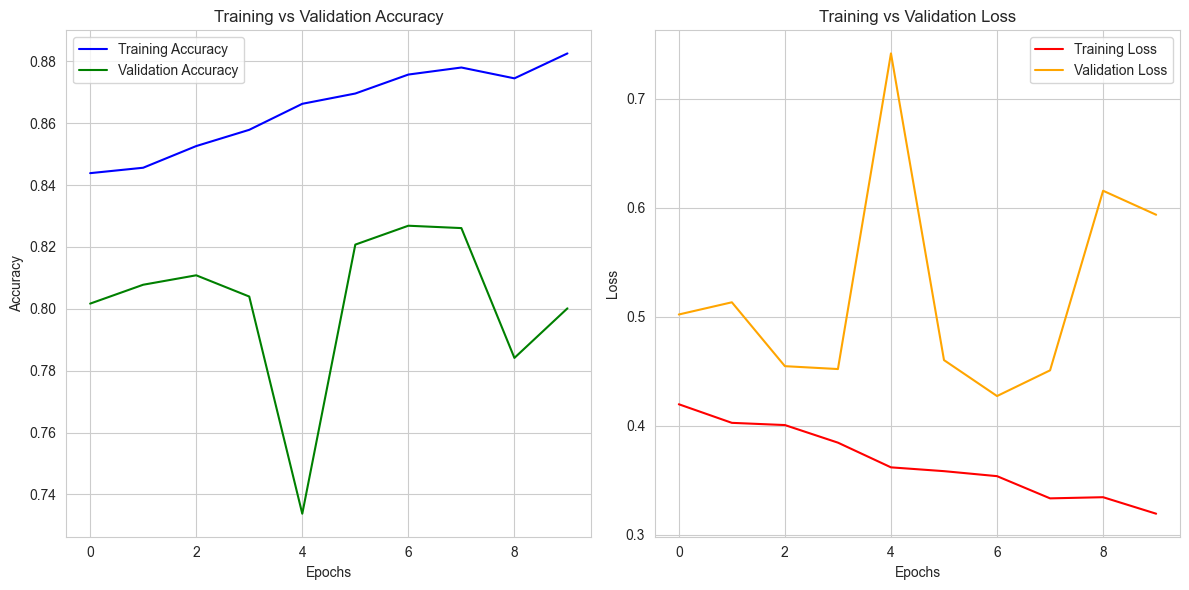

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Precisión (Accuracy) - Gráfico Izquierdo

- Línea azul (entrenamiento): Muestra un aumento constante en la precisión a lo largo de las 10 epochs, lo cual es esperado.
- Línea verde (validación): También muestra una mejora, aunque con una pendiente destacable y cierta variabilidad.

Pérdida (Loss) - Gráfico Derecho

- Línea roja (entrenamiento): Disminuye de forma constante, lo cual es una buena señal.
- Línea naranja (validación): También disminuye, aunque con algunas oscilaciones predominantes.

El modelo está aprendiendo correctamente, ya que ambas precisiones aumentan, y en cuanto a las oscilaciones podrían deberse a ruido en los datos o a un tamaño de lote pequeño, pero no parecen críticas.

### 4-. EVALUACION DE RESULTADOS ACORDE AL PROBLEMA
CLASIFICACION: ACCURACY, PRECISION, RECALL, F1

Para evaluar los resultados de un modelo de clasificación de manera exhaustiva (más allá del accuracy), es fundamental analizar otras métricas que ofrecen una visión más detallada sobre el rendimiento del modelo: Precision, Recall y F1-Score.
- Estas métricas son particularmente útiles en conjuntos de datos desbalanceados o en problemas donde es importante priorizar algunos errores sobre otros (como en problemas médicos).

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Reporte de clasificación:\n", report)


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step
Reporte de clasificación:
               precision    recall  f1-score   support

      glioma       0.23      0.13      0.17       300
  meningioma       0.21      0.19      0.20       306
     notumor       0.32      0.41      0.36       405
   pituitary       0.24      0.27      0.25       300

    accuracy                           0.26      1311
   macro avg       0.25      0.25      0.24      1311
weighted avg       0.25      0.26      0.25      1311



- Mejor clase: No Tumor, con el F1-score más alto (0.36).
- Peor clase: Glioma, con el F1-score más bajo (0.17).

### 5-. ANALISIS DE RESULTADOS

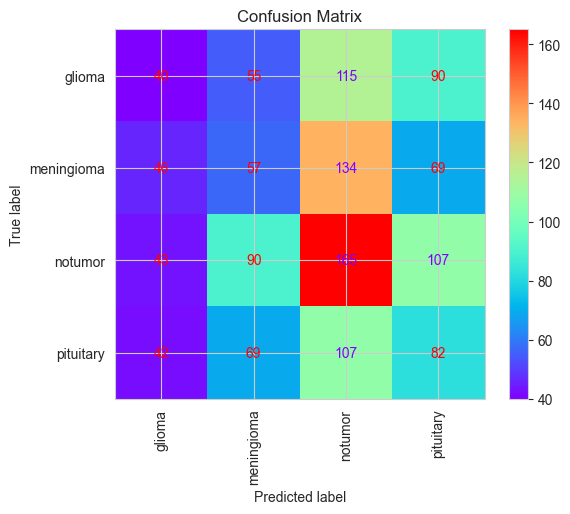

In [25]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap="rainbow", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()

En fin, con la matriz de confusión es una herramienta que me permite visualizar el desempeño de un modelo de clasificación, mostrando cuántas veces el modelo predijo correctamente o incorrectamente cada clase.

Ejes:
- Eje Y (vertical): clases reales (etiquetas verdaderas).
- Eje X (horizontal): clases predichas por el modelo.

Se observa que el modelo no está aprendiendo a distinguir bien entre las clases, tambien puede estar prediciendo una clase dominante con más frecuencia ("notumor"), lo que genera un sesgo.
Esto es coherente con el bajo F1-score y precisión que obtuvo.

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.8060 - loss: 0.5836
Accuracy en test: 0.80
Loss en test: 0.59


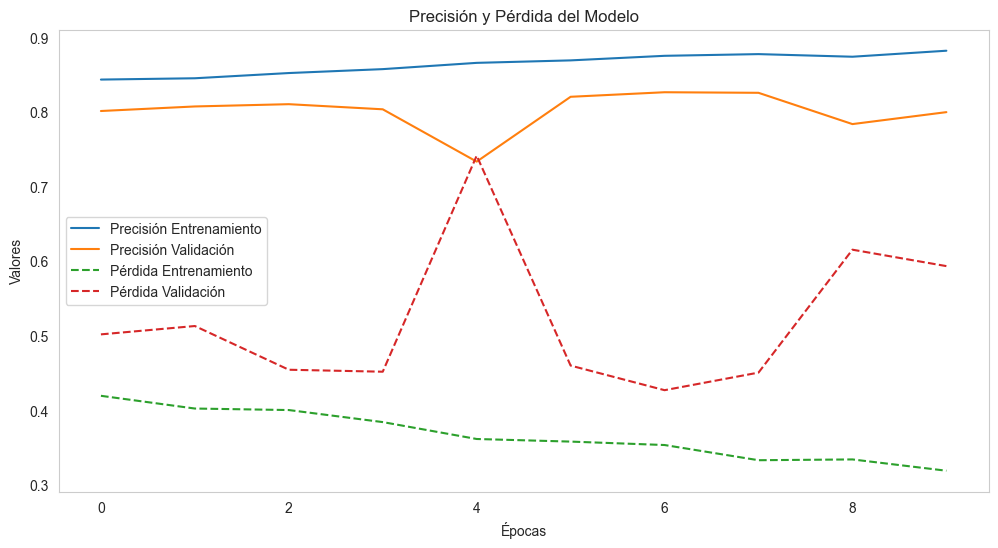

In [23]:
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(test_generator)
print(f"Accuracy en test: {accuracy:.2f}")
print(f"Loss en test: {loss:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', linestyle='--')
plt.plot(history.history['val_loss'], label='Pérdida Validación', linestyle='--')
plt.title('Precisión y Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.show()

### 6-.INTERPETRABILIDAD DE RESULTADOS

En cuanto a la interpretación de los resultados obtenidos en el entrenamiento y evaluación del modelo de clasificación de imágenes cerebrales:
 Podemos observar que en primer lugar, la distribución de clases en los conjuntos de entrenamiento y prueba es relativamente equilibrada, aunque con una ligera predominancia de la clase "notumor". Esto puede haber influido en el sesgo del modelo hacia esta clase, como se observó en la matriz de confusión y en los valores de F1-score. Además, las imágenes presentan una gran variabilidad en sus dimensiones (desde 150x168 hasta 1920x1446), lo que sugiere que el preprocesamiento (como el redimensionamiento a 150x150) fue crucial para estandarizar la entrada al modelo.

En segundo lugar, durante el entrenamiento, el modelo mostró una mejora progresiva tanto en precisión como en pérdida, alcanzando una precisión de entrenamiento del 80.02% y una precisión de validación del 0.80% al final de las 10 épocas. Esto indica que el modelo fue capaz de aprender patrones relevantes sin caer en un sobreajuste severo, aunque se observaron algunas oscilaciones en la pérdida de validación, posiblemente atribuibles a ruido en los datos o a un tamaño de lote pequeño. La gráfica de precisión muestra una tendencia ascendente tanto para entrenamiento como para validación, lo que refuerza la idea de un aprendizaje efectivo.

Sin embargo, al analizar el rendimiento por clase, se evidencia que el modelo no logra distinguir adecuadamente entre todas las categorías. La clase "notumor" fue la mejor clasificada, mientras que "meningioma" presentó el peor desempeño. Esto sugiere que, a pesar del buen rendimiento global, el modelo aún tiene dificultades para capturar características distintivas de ciertas clases. La matriz de confusión confirma esta tendencia, mostrando una alta tasa de confusión entre clases. En conclusion para mejorar este aspecto se podria aplicar técnicas como aumento de datos, ajuste de pesos por clase.

### EXTRA

Subi los epochs de 10 a 15, aplique Adams, sin embargo obtuve un resultado de exactitud (accuracy) de 78.87%, no lo considero suficiente.

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_ds = '/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset/Training'
testing_ds = '/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S06_proyecto/dataset/Testing'

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(training_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(testing_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, validation_data=test_generator)
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 557ms/step - accuracy: 0.4033 - loss: 1.2022 - val_accuracy: 0.5385 - val_loss: 1.1781
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 496ms/step - accuracy: 0.6377 - loss: 0.8718 - val_accuracy: 0.6186 - val_loss: 0.9936
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 566ms/step - accuracy: 0.6935 - loss: 0.7607 - val_accuracy: 0.5774 - val_loss: 1.2724
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 458ms/step - accuracy: 0.7107 - loss: 0.7256 - val_accuracy: 0.6629 - val_loss: 0.8532
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 507ms/step - accuracy: 0.7276 - loss: 0.6733 - val_accuracy: 0.6407 - val_loss: 0.9647
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 91s 509ms/step - accuracy: 0.7553 - loss: 0.6309 - val_accuracy: 0.7231 - val_loss: 0.7292
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 517ms/step - accuracy: 0.7770 - loss: 0.5804 - val_accuracy: 0.6095 - val_loss: 0.9907
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 88s 488ms/step - accuracy: 0.7725 - loss: